In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import NMF
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans

In [21]:
df = pd.read_csv('Cole2023pitchdata.csv')

In [22]:
df.columns

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estima

In [23]:
df

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length
0,FF,9/27/2023,96.1,-2.01,5.76,"Cole, Gerrit",666182,543037,field_out,hit_into_play,...,0,0,6,Strategic,Standard,212,0.000,-0.100,NaN,NaN
1,SL,9/27/2023,89.2,-2.05,5.77,"Cole, Gerrit",666182,543037,NaN,ball,...,0,0,6,Strategic,Standard,137,0.000,0.012,NaN,NaN
2,FF,9/27/2023,96.9,-2.16,5.74,"Cole, Gerrit",666182,543037,NaN,called_strike,...,0,0,6,Strategic,Standard,213,0.000,-0.017,NaN,NaN
3,FC,9/27/2023,91.0,-2.07,5.82,"Cole, Gerrit",543807,543037,field_out,hit_into_play,...,0,0,6,Strategic,Standard,180,-0.001,-0.169,NaN,NaN
4,FF,9/27/2023,97.1,-2.10,5.83,"Cole, Gerrit",595281,543037,strikeout,swinging_strike,...,0,0,6,Infield shade,Standard,208,-0.002,-0.214,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3276,FF,3/30/2023,96.7,-1.89,5.91,"Cole, Gerrit",624424,543037,NaN,foul,...,0,0,0,Standard,Standard,214,0.000,-0.054,NaN,NaN
3277,FF,3/30/2023,94.4,-1.74,6.03,"Cole, Gerrit",664774,543037,walk,ball,...,0,0,0,Infield shade,Standard,207,-0.036,0.155,NaN,NaN
3278,FF,3/30/2023,96.4,-1.67,6.03,"Cole, Gerrit",664774,543037,NaN,ball,...,0,0,0,Infield shade,Standard,222,0.000,0.135,NaN,NaN
3279,FF,3/30/2023,95.0,-1.69,6.07,"Cole, Gerrit",664774,543037,NaN,ball,...,0,0,0,Infield shade,Standard,208,0.000,0.064,NaN,NaN


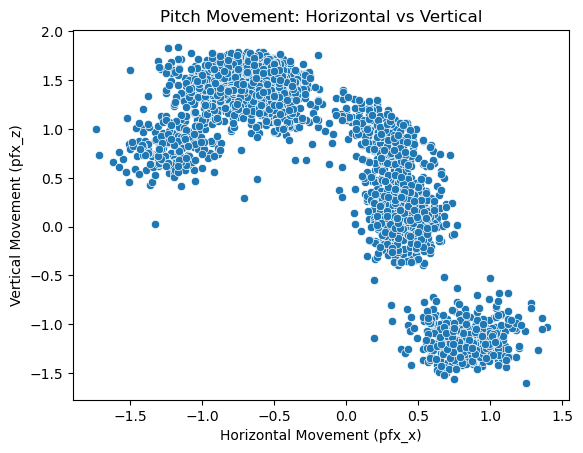

In [24]:
sns.scatterplot(data=df, x='pfx_x', y='pfx_z')
plt.xlabel('Horizontal Movement (pfx_x)')
plt.ylabel('Vertical Movement (pfx_z)')
plt.title('Pitch Movement: Horizontal vs Vertical')
plt.show()

c:\Users\chris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\chris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=13.
  warnings.warn(


   pfx_x  pfx_z  cluster cluster_label
0  -0.65   1.52        5        sinker
1   0.42  -0.01        1      changeup
2  -0.77   1.42        0      fastball
3   0.50   0.70        4        cutter
4  -0.59   1.49        5        sinker


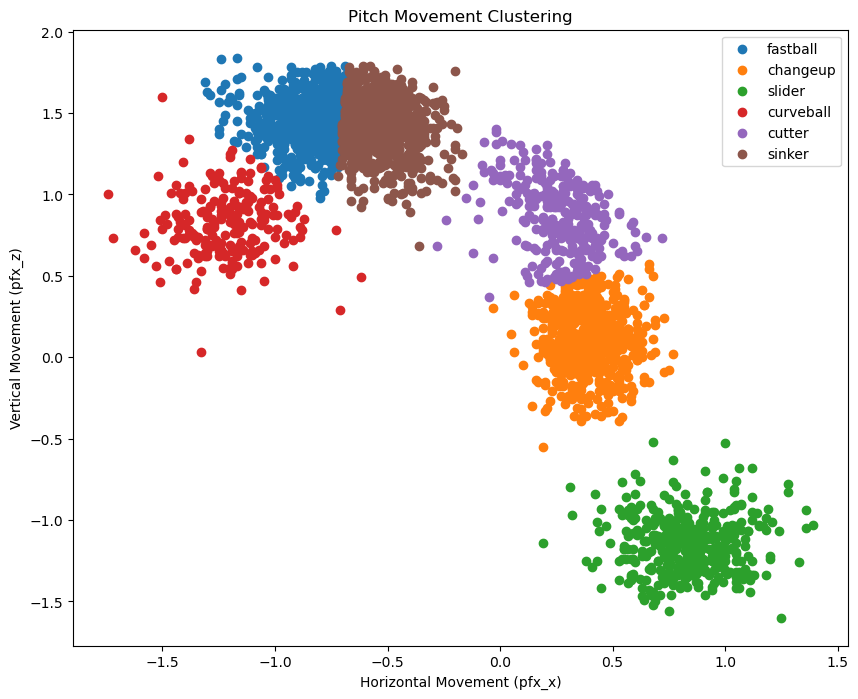

In [25]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

scaler = StandardScaler()
df[['pfx_x_scaled', 'pfx_z_scaled']] = scaler.fit_transform(df[['pfx_x', 'pfx_z']])

# Run K-means clustering
kmeans = KMeans(n_clusters=6, random_state=42)
df['cluster'] = kmeans.fit_predict(df[['pfx_x_scaled', 'pfx_z_scaled']])

cluster_labels = {
    0: 'fastball',
    1: 'changeup',
    2: 'slider',
    3: 'curveball',
    4: 'cutter',
    5: 'sinker'
}

df['cluster_label'] = df['cluster'].map(cluster_labels)

print(df[['pfx_x', 'pfx_z', 'cluster', 'cluster_label']].head())

plt.figure(figsize=(10, 8))
for cluster, label in cluster_labels.items():
    cluster_points = df[df['cluster'] == cluster]
    plt.scatter(cluster_points['pfx_x'], cluster_points['pfx_z'], label=label)

plt.xlabel('Horizontal Movement (pfx_x)')
plt.ylabel('Vertical Movement (pfx_z)')
plt.title('Pitch Movement Clustering')
plt.legend()
plt.show()


c:\Users\chris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\chris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=13.
  warnings.warn(
c:\Users\chris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\chris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environm

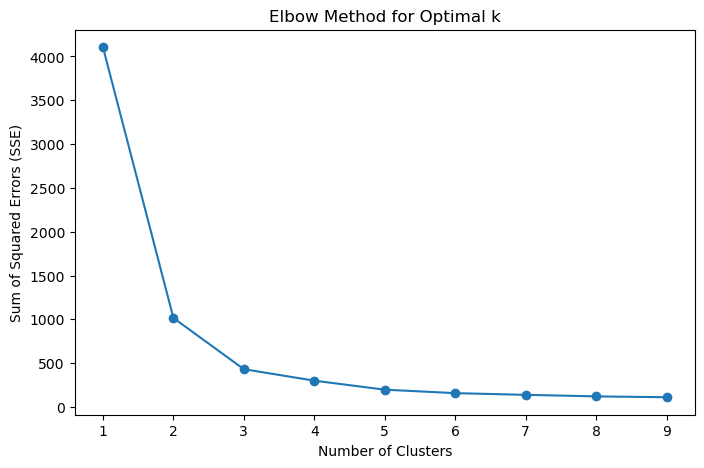

c:\Users\chris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\chris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=13.
  warnings.warn(
C:\Users\chris\AppData\Local\Temp\ipykernel_14788\1626749076.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pitch_movement_data['cluster'] = kmeans.fit_predict(pitch_movement_data)


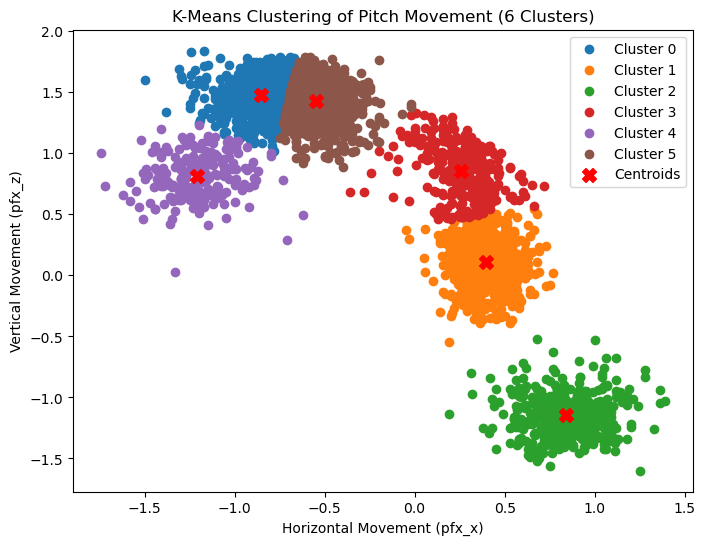

In [26]:
pitch_movement_data = df[['pfx_x', 'pfx_z']]

# Determine the optimal number of clusters using the elbow method
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(pitch_movement_data)
    sse.append(kmeans.inertia_)

# Plotting the elbow curve to choose the optimal number of clusters
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), sse, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.title("Elbow Method for Optimal k")
plt.show()

optimal_k = 6
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
pitch_movement_data['cluster'] = kmeans.fit_predict(pitch_movement_data)

# Plot the clusters
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    cluster_data = pitch_movement_data[pitch_movement_data['cluster'] == cluster]
    plt.scatter(cluster_data['pfx_x'], cluster_data['pfx_z'], label=f'Cluster {cluster}')

# Add the centroids
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=100, label='Centroids')

plt.xlabel("Horizontal Movement (pfx_x)")
plt.ylabel("Vertical Movement (pfx_z)")
plt.title(f"K-Means Clustering of Pitch Movement ({optimal_k} Clusters)")
plt.legend()
plt.show()

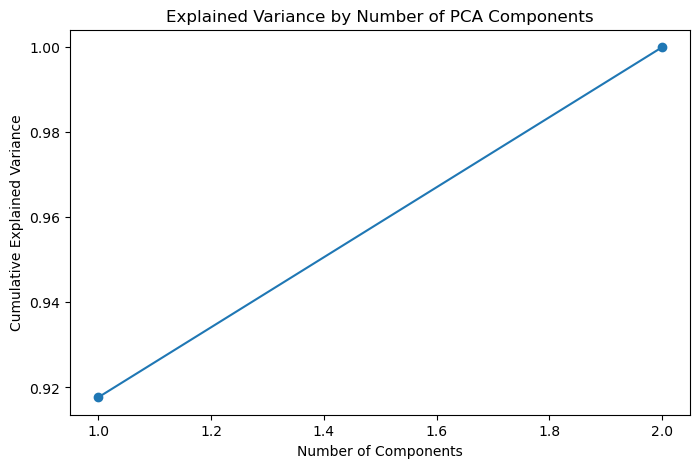

PCA Loadings (Feature Contributions):
            PC1       PC2
pfx_x  0.707107 -0.707107
pfx_z -0.707107 -0.707107


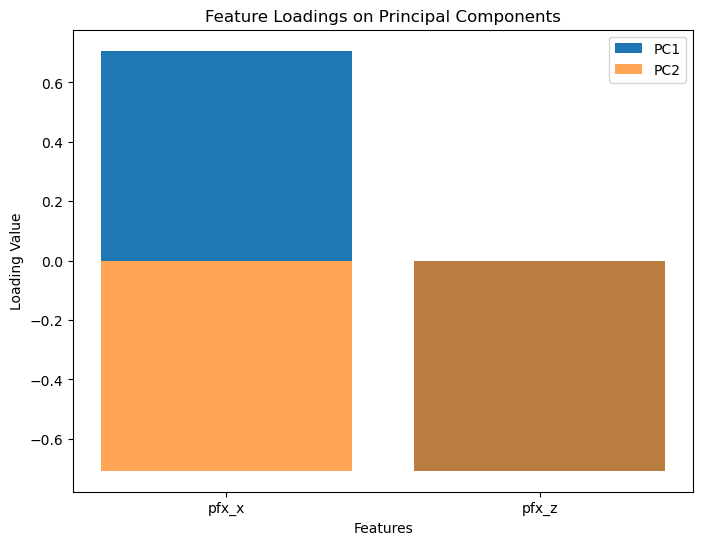

In [27]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Load your dataset (replace 'your_dataset.csv' with your actual file path)

# Select the relevant features (including pfx_x, pfx_z, and any other features you'd like to analyze)
features = ['pfx_x', 'pfx_z']  # Add other features if present, e.g., 'release_speed', 'spin_rate'
X = df[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance to see how many components to keep
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by Number of PCA Components")
plt.show()

# Display the loadings (coefficients of the features in the principal components)
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(len(features))], index=features)
print("PCA Loadings (Feature Contributions):")
print(loadings)

# Optional: Plot the loadings for the first two principal components
plt.figure(figsize=(8, 6))
plt.bar(loadings.index, loadings['PC1'], label='PC1')
plt.bar(loadings.index, loadings['PC2'], label='PC2', alpha=0.7)
plt.xlabel("Features")
plt.ylabel("Loading Value")
plt.title("Feature Loadings on Principal Components")
plt.legend()
plt.show()
